# Markov Models

1. Create a simple Markov model

In [ ]:
TT = matrix(c(.8, .05, .15, .2, .3, .5, .2, .6, .2), 3, 3)

In [ ]:
TT

In [ ]:
ss = c(1, 0, 0)

In [ ]:
TT %*% ss

In [ ]:
TT %*% TT %*% ss

2. Generate a sequence of states

In [ ]:
allss <- 1
ss <- 1
for (tt in 2:100) {
    ss <- sample(1:3, 1, prob=TT[, ss])
    allss <- c(allss, ss)
}

In [ ]:
states <- c("Sunny", "Rainy", "Cloudy")[allss]
paste(states, collapse=", ")

3. Construct a barometer reading based on the states

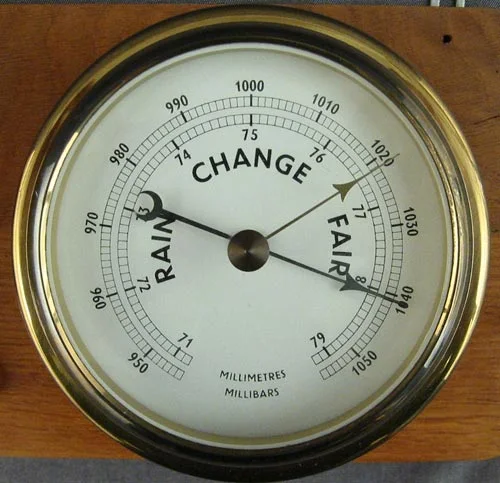

In [ ]:
mus = c(1025, 975, 1000)
sds = c(25, 25, 25)

In [ ]:
observed = c()
for (tt in 1:100) {
    obs = rnorm(1, mus[allss[tt]], sds[allss[tt]])
    observed = c(observed, obs)
}

In [ ]:
df = data.frame(time=1:100, observed, states)

In [ ]:
library(ggplot2)

ggplot(df, aes(time, observed, colour=states)) + geom_point()

In [ ]:
install.packages("depmixS4")
library(depmixS4)

In [ ]:
mod <- depmix(response=observed ~ 1, data=df, nstates=3)

In [ ]:
mod

In [ ]:
hmm <- fit(mod)

In [ ]:
summary(hmm)

In [ ]:
viterbi(hmm)

In [ ]:
df$predss = viterbi(hmm)$state

In [ ]:
df$predstate = c('Cloudy', 'Sunny', 'Rainy')[df$predss]

In [ ]:
head(df)

In [ ]:
table(paste(df$states, df$predstate))

In [ ]:
allss <- 1
ss <- 1
for (tt in 2:1000) {
    ss <- sample(1:3, 1, prob=TT[, ss])
    allss <- c(allss, ss)
}

In [ ]:
observed = c()
for (tt in 1:1000) {
    obs = rnorm(1, mus[allss[tt]], sds[allss[tt]])
    observed = c(observed, obs)
}

In [ ]:
states <- c("Sunny", "Rainy", "Cloudy")[allss]
df = data.frame(time=1:1000, observed, states)

In [ ]:
mod <- depmix(response=observed ~ 1, data=df, nstates=3)
hmm <- fit(mod)

In [ ]:
summary(hmm)

In [ ]:
df$predss = viterbi(hmm)$state
df$predstate = c('Sunny', 'Rainy', 'Cloudy')[df$predss]

In [ ]:
table(paste(df$states, df$predstate))